# Доверительные интервалы на основе bootstrap

In [1]:
import numpy as np
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/emily/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Загрузка данных

### Время ремонта телекоммуникаций

Verizon — основная региональная телекоммуникационная компания (Incumbent Local Exchange Carrier, ILEC) в западной 
части США. В связи с этим данная компания обязана предоставлять сервис ремонта телекоммуникационного оборудования 
не только для своих клиентов, но и для клиентов других локальных телекоммуникационых компаний (Competing Local Exchange Carriers, CLEC). При этом в случаях, когда время ремонта оборудования для клиентов других компаний существенно выше, чем для собственных, Verizon может быть оштрафована. 

In [3]:
data = pd.read_csv('verizon.txt', sep='\t')
data.shape

(1687, 2)

In [4]:
data.head()

,Time,Group
0,17.50,ILEC
1,2.40,ILEC
2,0.00,ILEC
3,0.65,ILEC
4,22.23,ILEC


In [5]:
data.Group.value_counts()

ILEC    1664
CLEC      23
Name: Group, dtype: int64

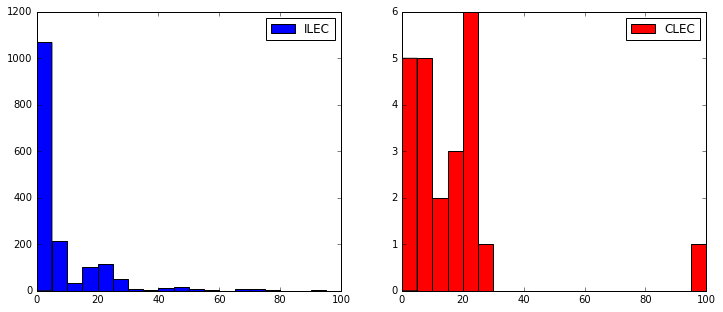

In [6]:
pylab.figure(figsize(12, 5))
pylab.subplot(1,2,1)
pylab.hist(data[data.Group == 'ILEC'].Time, bins = 20, color = 'b', range = (0, 100), label = 'ILEC')
pylab.legend()

pylab.subplot(1,2,2)
pylab.hist(data[data.Group == 'CLEC'].Time, bins = 20, color = 'r', range = (0, 100), label = 'CLEC')
pylab.legend()

pylab.show()

## Bootstrap

In [7]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [8]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

### Интервальная оценка медианы

In [9]:
ilec_time = data[data.Group == 'ILEC'].Time.values
clec_time = data[data.Group == 'CLEC'].Time.values

In [10]:
np.random.seed(0)

ilec_median_scores = map(np.median, get_bootstrap_samples(ilec_time, 1000))
clec_median_scores = map(np.median, get_bootstrap_samples(clec_time, 1000))

print "95% confidence interval for the ILEC median repair time:",  stat_intervals(ilec_median_scores, 0.05)
print "95% confidence interval for the CLEC median repair time:",  stat_intervals(clec_median_scores, 0.05)

95% confidence interval for the ILEC median repair time: [ 3.18     3.82525]
95% confidence interval for the CLEC median repair time: [  5.79125  20.     ]


### Точечная оценка разности медиан

In [11]:
print "difference between medians:", np.median(clec_time) - np.median(ilec_time)

difference between medians: 10.74


### Интервальная оценка разности медиан

In [12]:
delta_median_scores = map(lambda x: x[1] - x[0], zip(ilec_median_scores, clec_median_scores))

In [13]:
print "95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05)

95% confidence interval for the difference between medians [  2.04975  16.63   ]
